#**TF  ESTIMATOR**

**Import python module**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as k
%matplotlib inline

**How many columns**

In [0]:
feat_cols = [ tf.feature_column.numeric_column('x', shape = [1])]

**Model konsa use krna h**

In [3]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpoq0792oh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f14f3c6e208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**Random Data for X**

In [0]:
x_data = np.linspace(0.0, 10.0, 100000)

In [0]:
noise = np.random.randn(len(x_data))

**Random data for Y**
 y = mx + c 

In [0]:
y_true = (0.5 * x_data) + 5 + noise 

**X Data change in DataFrame**

In [0]:
x_df = pd.DataFrame(data = x_data, columns = ['X Data'])

**Y Data change in DataFrame**

In [0]:
y_df = pd.DataFrame(data = y_true, columns = ['Y'])

In [15]:
y_df.head()

,Y
0,3.456894
1,6.540527
2,6.631033
3,5.928456
4,5.746650


**Concat X and Y Data**

In [0]:
my_data = pd.concat([x_df, y_df], axis = 1)

In [18]:
my_data.head()

,X Data,Y
0,0.0000,3.456894
1,0.0001,6.540527
2,0.0002,6.631033
3,0.0003,5.928456
4,0.0004,5.746650


I have large data set  
but represent only sample data

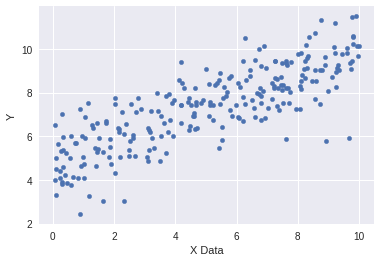

In [20]:
my_data.sample(n = 250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

**split train_test data**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size = 0.3,
                                                   random_state = 101)

In [28]:
print('Train dataset shape : ')
print('X_data : ' +str(x_train.shape))
print('Y_data : '+str(y_train.shape))
print('---------------')
print('Test dataset shape : ')
print('X_evel : ' +str(x_evel.shape))
print('Y_evel : '+str(y_evel.shape))

Train dataset shape : 
X_data : (70000,)
Y_data : (70000,)
---------------
Test dataset shape : 
X_evel : (30000,)
Y_evel : (30000,)


In [0]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,
                                               batch_size = 8, num_epochs = None, shuffle = True)

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,
                                               batch_size = 8, num_epochs = 1000, shuffle = False)

In [0]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_evel}, y_evel,
                                               batch_size = 8, num_epochs = 1000, shuffle = False)

In [33]:
estimator.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpoq0792oh/model.ckpt.
INFO:tensorflow:loss = 554.1658, step = 1
INFO:tensorflow:global_step/sec: 750.91
INFO:tensorflow:loss = 11.512657, step = 101 (0.138 sec)
INFO:tensorflow:global_step/sec: 901.929
INFO:tensorflow:loss = 43.376698, step = 201 (0.111 sec)
INFO:tensorflow:global_step/sec: 832.619
INFO:tensorflow:loss = 18.932388, step = 301 (0.116 sec)
INFO:tensorflow:global_step/sec: 833.927
INFO:tensorflow:loss = 11.684238, step = 401 (0.122 sec)
INFO:tensorflow:global_step/sec: 901.978
INFO:tensorflow:loss = 18.95121, step = 501 (0.111 sec)
INFO:tensorflow:global_step/sec: 823.457
INFO:tensorflow:loss = 7.5103235, step = 601 (0.120 sec)
INFO:tensorflow:global_step/sec: 856.515
INFO:tensorflow:los

In [36]:
train_matrics = estimator.evaluate(input_fn = train_input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-26-16:02:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoq0792oh/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-26-16:02:21
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1130158, global_step = 1000, label/mean = 7.5000863, loss = 8.904126, prediction/mean = 7.318491
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000

In [43]:
eval_matrics = estimator.evaluate(input_fn = eval_input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-26-16:06:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoq0792oh/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-26-16:06:56
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1137418, global_step = 1000, label/mean = 7.51391, loss = 8.909934, prediction/mean = 7.332231
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: 

In [41]:
print('train Data matrics') 
print(train_matrics)

train Data matrics
{'average_loss': 1.1130158, 'label/mean': 7.5000863, 'loss': 8.904126, 'prediction/mean': 7.318491, 'global_step': 1000}


In [44]:
print('eval matrix')
print(eval_matrics)

eval matrix
{'average_loss': 1.1137418, 'label/mean': 7.51391, 'loss': 8.909934, 'prediction/mean': 7.332231, 'global_step': 1000}


In [0]:
new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': new_data},
                                                     shuffle = False)

In [47]:
list(estimator.predict(input_fn = input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoq0792oh/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.390606], dtype=float32)},
 {'predictions': array([5.0425835], dtype=float32)},
 {'predictions': array([5.694561], dtype=float32)},
 {'predictions': array([6.346538], dtype=float32)},
 {'predictions': array([6.9985156], dtype=float32)},
 {'predictions': array([7.6504927], dtype=float32)},
 {'predictions': array([8.30247], dtype=float32)},
 {'predictions': array([8.954448], dtype=float32)},
 {'predictions': array([9.606425], dtype=float32)},
 {'predictions': array([10.258402], dtype=float32)}]

In [49]:
predictions = []
for pred in estimator.predict(input_fn = input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoq0792oh/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [50]:
predictions

[array([4.390606], dtype=float32),
 array([5.0425835], dtype=float32),
 array([5.694561], dtype=float32),
 array([6.346538], dtype=float32),
 array([6.9985156], dtype=float32),
 array([7.6504927], dtype=float32),
 array([8.30247], dtype=float32),
 array([8.954448], dtype=float32),
 array([9.606425], dtype=float32),
 array([10.258402], dtype=float32)]

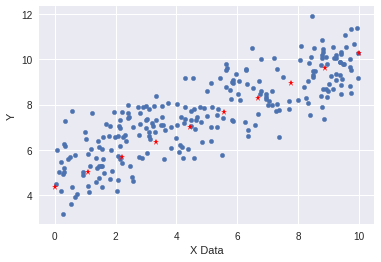

In [56]:
my_data.sample(n = 250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(new_data,predictions,'r*')

In [55]:
print('new data' + str(new_data) +'\n')

new data[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]



In [53]:
print(    'pred ' + str(predictions))

pred [array([4.390606], dtype=float32), array([5.0425835], dtype=float32), array([5.694561], dtype=float32), array([6.346538], dtype=float32), array([6.9985156], dtype=float32), array([7.6504927], dtype=float32), array([8.30247], dtype=float32), array([8.954448], dtype=float32), array([9.606425], dtype=float32), array([10.258402], dtype=float32)]
